In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import sklearn
import scipy
import gzip

import  csv
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.integrate import simps
from numpy import trapz

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash
head -76 "Lysozyme_Concentration_Curve_Trehalose_Adonitol_Arabitol_40min _A450_25C_031019_v011(1).csv" |tail -49 >temp6

In [3]:
%%bash
head -42 temp6> temp5

In [4]:
%%bash
cut  -d "," -f 3- temp5 > temp3

In [5]:
%%bash
tr -cd '[:print:][:cntrl:]'  < temp3 > test3.csv

In [6]:
raw_data=pd.read_csv("test3.csv", index_col=False )

In [7]:
#remove NAN
raw_data2=raw_data.dropna(axis=1)

In [8]:
colnames=list(raw_data2)

In [9]:
%%bash
head -76 "Lysozyme_Concentration_Curve_Trehalose_Adonitol_Arabitol_40min _A450_25C_031019_v012_.csv" |tail -49 >temp6

In [10]:
%%bash
head -42 temp6> temp5

In [11]:
%%bash
cut  -d "," -f 3- temp5 > temp3

In [12]:
%%bash
tr -cd '[:print:][:cntrl:]'  < temp3 > test3.csv

In [13]:
raw_data3=pd.read_csv("test3.csv", index_col=False )

In [14]:
#remove NAN
raw_data4=raw_data3.dropna(axis=1)

In [15]:
NCURVES = 6
values = range(NCURVES)

AUCS=[]

for i in range(1, 9):
    df1=raw_data2.loc[:,colnames[35+(i-1)*3:35+i*3]]
    df_pos=raw_data2.loc[:,colnames[8:11]]
    df_treh=raw_data2.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df=pd.concat([df_pos,df_treh,df1], axis=1)

    num=0
    AUC=[]

    for column in df:
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)      
        num+=1
  
    AUCS.append(AUC)    

In [16]:
names0=colnames[8][0:9]
names1=colnames[11][0:9]
names2=colnames[35][0:9]
names3=colnames[59][0:9]

column_list=[names0, names0+'1', names0+'2', names1, names1+'1', names1+'2',names2, names2+'1', names2+'2']

#index_list=['10mM','1mM','0.1mM','0.01mM','0.001mM','0.0001mM','0.00001mM','0.000001mM']
index_list=[10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]

In [17]:
df_auc=pd.DataFrame(AUCS, columns=column_list, index=index_list).astype(float)
df_auc

,Pos Ctrl,Pos Ctrl1,Pos Ctrl2,Trehalose,Trehalose1,Trehalose2,Adonitol,Adonitol1,Adonitol2
10.000000,145.915,155.3825,149.4675,285.0575,179.3750,148.7500,167.9125,139.5275,152.1625
1.000000,145.915,155.3825,149.4675,153.6150,144.6200,152.2850,161.6475,161.1400,172.3575
0.100000,145.915,155.3825,149.4675,168.4025,168.2100,166.9150,162.3825,188.7550,197.5750
0.010000,145.915,155.3825,149.4675,172.3400,160.9125,155.4875,232.4350,185.2200,170.0650
0.001000,145.915,155.3825,149.4675,163.5900,158.5500,175.4725,167.8600,170.2925,152.4425
0.000100,145.915,155.3825,149.4675,144.5675,145.8625,160.3350,150.0800,158.6900,170.5900
0.000010,145.915,155.3825,149.4675,158.6025,151.5325,163.6775,157.7625,161.2450,175.6825
0.000001,145.915,155.3825,149.4675,163.8175,187.3900,145.4250,165.6900,180.6875,173.0400


<Figure size 432x288 with 0 Axes>

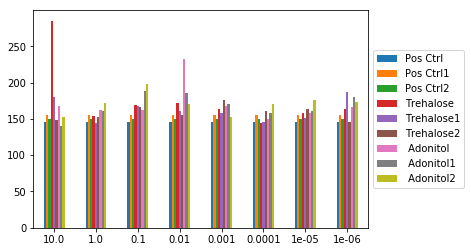

In [18]:
f = plt.figure()
df_auc.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [19]:
#remove outliers
df_auc.iloc[0,3]=np.nan
df_auc.iloc[7,4]=np.nan

df_auc.iloc[3,6]=np.nan

<Figure size 432x288 with 0 Axes>

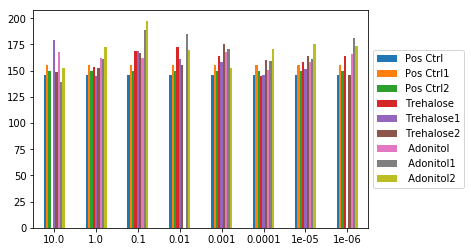

In [20]:
f = plt.figure()
df_auc.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
df_auc[names1+'/'+names0+'_mean']=df_auc.iloc[:,3]/(df_auc.iloc[:,0:3].mean(axis=1))
df_auc[names1+' 1/'+names0+'_mean']=df_auc.iloc[:,4]/(df_auc.iloc[:,0:3].mean(axis=1))
df_auc[names1+' 2/'+names0+'_mean']=df_auc.iloc[:,5]/(df_auc.iloc[:,0:3].mean(axis=1))
df_auc[names2+'/'+names0+'_mean']=df_auc.iloc[:,6]/(df_auc.iloc[:,0:3].mean(axis=1))
df_auc[names2+' 1/'+names0+'_mean']=df_auc.iloc[:,7]/(df_auc.iloc[:,0:3].mean(axis=1))
df_auc[names2+' 2/'+names0+'_mean']=df_auc.iloc[:,8]/(df_auc.iloc[:,0:3].mean(axis=1))

df_auc

,Pos Ctrl,Pos Ctrl1,Pos Ctrl2,Trehalose,Trehalose1,Trehalose2,Adonitol,Adonitol1,Adonitol2,Trehalose/Pos Ctrl_mean,Trehalose 1/Pos Ctrl_mean,Trehalose 2/Pos Ctrl_mean,Adonitol/Pos Ctrl_mean,Adonitol 1/Pos Ctrl_mean,Adonitol 2/Pos Ctrl_mean
10.000000,145.915,155.3825,149.4675,NaN,179.3750,148.7500,167.9125,139.5275,152.1625,NaN,1.193804,0.989984,1.117517,0.928605,1.012695
1.000000,145.915,155.3825,149.4675,153.6150,144.6200,152.2850,161.6475,161.1400,172.3575,1.022362,0.962497,1.013510,1.075821,1.072444,1.147100
0.100000,145.915,155.3825,149.4675,168.4025,168.2100,166.9150,162.3825,188.7550,197.5750,1.120778,1.119497,1.110878,1.080713,1.256231,1.314931
0.010000,145.915,155.3825,149.4675,172.3400,160.9125,155.4875,NaN,185.2200,170.0650,1.146983,1.070929,1.034824,NaN,1.232704,1.131843
0.001000,145.915,155.3825,149.4675,163.5900,158.5500,175.4725,167.8600,170.2925,152.4425,1.088749,1.055206,1.167831,1.117167,1.133357,1.014559
0.000100,145.915,155.3825,149.4675,144.5675,145.8625,160.3350,150.0800,158.6900,170.5900,0.962148,0.970766,1.067086,0.998835,1.056138,1.135337
0.000010,145.915,155.3825,149.4675,158.6025,151.5325,163.6775,157.7625,161.2450,175.6825,1.055556,1.008502,1.089331,1.049965,1.073142,1.169229
0.000001,145.915,155.3825,149.4675,163.8175,NaN,145.4250,165.6900,180.6875,173.0400,1.090263,NaN,0.967855,1.102725,1.202539,1.151642


<Figure size 432x288 with 0 Axes>

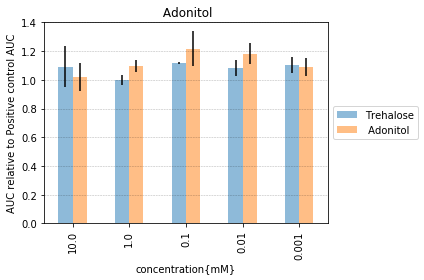

In [22]:
df_auc_treh_mean=df_auc.iloc[0:5, 9:12].mean(axis=1)

df_auc_treh_std=df_auc.iloc[0:5, 9:12].std(axis=1)

df_auc_compound_mean=df_auc.iloc[0:5, 12:15].mean(axis=1)

df_auc_compound_std=df_auc.iloc[0:5, 12:15].std(axis=1)

df_bar=pd.concat([df_auc_treh_mean,df_auc_compound_mean,df_auc_treh_std, df_auc_compound_std], axis=1)

df_bar.columns=[names1,names2, 'std1','std2']

df_bar

f = plt.figure()
df_bar[[names1, names2]].plot(kind='bar', yerr=df_bar[['std1', 'std2']].values.T, alpha = 0.5,error_kw=dict(ecolor='k'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(names2)
plt.ylabel('AUC relative to Positive control AUC')
plt.xlabel('concentration{mM}')
plt.ylim([0,1.4])
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars_AUC_'+names2+'relative_to_PosControl_v1_HC2.png')
plt.show()

In [23]:
NCURVES = 6
values = range(NCURVES)

AUCS=[]

for i in range(1, 9):
    df2=raw_data4.loc[:,colnames[35+(i-1)*3:35+i*3]]
    df_treh=raw_data4.loc[:,colnames[11+(i-1)*3:11+i*3]]
    df_pos=raw_data4.loc[:,colnames[8:11]]   
    df=pd.concat([df_pos,df_treh,df2], axis=1)
    num=0
    AUC=[]
    
    for column in df:
        y = np.array(df.loc[5:, column])

        # Compute the area using the composite trapezoidal rule.
        area = trapz(y, dx=35)
        AUC.append(area)

        num+=1
  
    AUCS.append(AUC)    

In [24]:
df_auc2=pd.DataFrame(AUCS, columns=column_list, index=index_list).astype(float)
df_auc2

,Pos Ctrl,Pos Ctrl1,Pos Ctrl2,Trehalose,Trehalose1,Trehalose2,Adonitol,Adonitol1,Adonitol2
10.000000,160.02,148.645,147.7,145.6350,180.0750,150.3600,193.3225,157.9725,158.4450
1.000000,160.02,148.645,147.7,149.5200,152.3025,157.1325,150.6225,150.9550,164.4125
0.100000,160.02,148.645,147.7,161.1400,152.7925,157.3775,175.5425,179.6900,173.4425
0.010000,160.02,148.645,147.7,153.2825,159.0225,160.5100,163.4325,236.7050,156.6775
0.001000,160.02,148.645,147.7,169.4875,157.9900,158.7775,147.1575,155.2250,146.4400
0.000100,160.02,148.645,147.7,152.8100,152.5125,162.1900,148.6800,173.6175,143.3250
0.000010,160.02,148.645,147.7,149.4675,151.0775,162.6975,152.9675,146.8775,159.7575
0.000001,160.02,148.645,147.7,150.2375,150.0275,151.3750,144.0600,145.6000,139.8775


<Figure size 432x288 with 0 Axes>

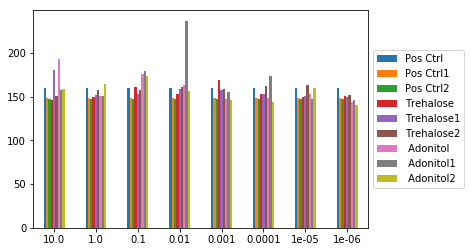

In [25]:
f = plt.figure()
df_auc2.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [26]:
#remove outliers
df_auc2.iloc[0,4]=np.nan

df_auc2.iloc[0,6]=np.nan
df_auc2.iloc[3,7]=np.nan
df_auc2


,Pos Ctrl,Pos Ctrl1,Pos Ctrl2,Trehalose,Trehalose1,Trehalose2,Adonitol,Adonitol1,Adonitol2
10.000000,160.02,148.645,147.7,145.6350,NaN,150.3600,NaN,157.9725,158.4450
1.000000,160.02,148.645,147.7,149.5200,152.3025,157.1325,150.6225,150.9550,164.4125
0.100000,160.02,148.645,147.7,161.1400,152.7925,157.3775,175.5425,179.6900,173.4425
0.010000,160.02,148.645,147.7,153.2825,159.0225,160.5100,163.4325,NaN,156.6775
0.001000,160.02,148.645,147.7,169.4875,157.9900,158.7775,147.1575,155.2250,146.4400
0.000100,160.02,148.645,147.7,152.8100,152.5125,162.1900,148.6800,173.6175,143.3250
0.000010,160.02,148.645,147.7,149.4675,151.0775,162.6975,152.9675,146.8775,159.7575
0.000001,160.02,148.645,147.7,150.2375,150.0275,151.3750,144.0600,145.6000,139.8775


<Figure size 432x288 with 0 Axes>

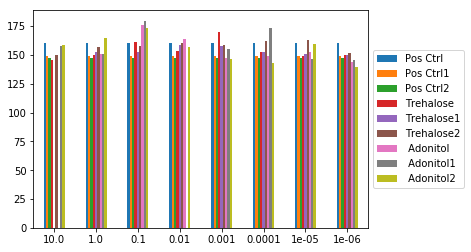

In [27]:
f = plt.figure()
df_auc2.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [28]:
df_auc2[names1+'/'+names0+'_mean']=df_auc2.iloc[:,3]/(df_auc2.iloc[:,0:3].mean(axis=1))
df_auc2[names1+' 1/'+names0+'_mean']=df_auc2.iloc[:,4]/(df_auc2.iloc[:,0:3].mean(axis=1))
df_auc2[names1+' 2/'+names0+'_mean']=df_auc2.iloc[:,5]/(df_auc2.iloc[:,0:3].mean(axis=1))
df_auc2[names2+'/'+names0+'_mean']=df_auc2.iloc[:,6]/(df_auc2.iloc[:,0:3].mean(axis=1))
df_auc2[names2+' 1/'+names0+'_mean']=df_auc2.iloc[:,7]/(df_auc2.iloc[:,0:3].mean(axis=1))
df_auc2[names2+' 2/'+names0+'_mean']=df_auc2.iloc[:,8]/(df_auc2.iloc[:,0:3].mean(axis=1))

df_auc2

,Pos Ctrl,Pos Ctrl1,Pos Ctrl2,Trehalose,Trehalose1,Trehalose2,Adonitol,Adonitol1,Adonitol2,Trehalose/Pos Ctrl_mean,Trehalose 1/Pos Ctrl_mean,Trehalose 2/Pos Ctrl_mean,Adonitol/Pos Ctrl_mean,Adonitol 1/Pos Ctrl_mean,Adonitol 2/Pos Ctrl_mean
10.000000,160.02,148.645,147.7,145.6350,NaN,150.3600,NaN,157.9725,158.4450,0.957359,NaN,0.988419,NaN,1.038462,1.041568
1.000000,160.02,148.645,147.7,149.5200,152.3025,157.1325,150.6225,150.9550,164.4125,0.982897,1.001189,1.032940,0.990145,0.992331,1.080796
0.100000,160.02,148.645,147.7,161.1400,152.7925,157.3775,175.5425,179.6900,173.4425,1.059284,1.004410,1.034550,1.153961,1.181226,1.140156
0.010000,160.02,148.645,147.7,153.2825,159.0225,160.5100,163.4325,NaN,156.6775,1.007631,1.045364,1.055142,1.074354,NaN,1.029949
0.001000,160.02,148.645,147.7,169.4875,157.9900,158.7775,147.1575,155.2250,146.4400,1.114158,1.038577,1.043753,0.967367,1.020400,0.962651
0.000100,160.02,148.645,147.7,152.8100,152.5125,162.1900,148.6800,173.6175,143.3250,1.004525,1.002569,1.066186,0.977376,1.141307,0.942173
0.000010,160.02,148.645,147.7,149.4675,151.0775,162.6975,152.9675,146.8775,159.7575,0.982552,0.993136,1.069522,1.005560,0.965526,1.050196
0.000001,160.02,148.645,147.7,150.2375,150.0275,151.3750,144.0600,145.6000,139.8775,0.987614,0.986234,0.995092,0.947005,0.957129,0.919511


<Figure size 432x288 with 0 Axes>

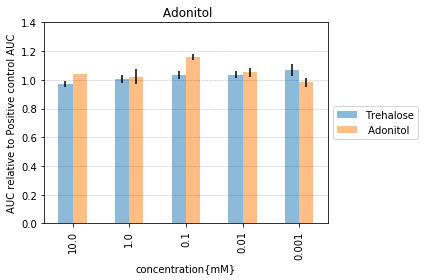

In [29]:
df_auc2_treh_mean=df_auc2.iloc[0:5, 9:12].mean(axis=1)

df_auc2_treh_std=df_auc2.iloc[0:5, 9:12].std(axis=1)

df_auc2_compound_mean=df_auc2.iloc[0:5, 12:15].mean(axis=1)

df_auc2_compound_std=df_auc2.iloc[0:5, 12:15].std(axis=1)

df_bar2=pd.concat([df_auc2_treh_mean,df_auc2_compound_mean,df_auc2_treh_std, df_auc2_compound_std], axis=1)

df_bar2.columns=[names1,names2, 'std1','std2']

df_bar2

f = plt.figure()
df_bar2[[names1, names2]].plot(kind='bar', yerr=df_bar2[['std1', 'std2']].values.T, alpha = 0.5,error_kw=dict(ecolor='k'))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(names2)
plt.ylabel('AUC relative to Positive control AUC')
plt.xlabel('concentration{mM}')
plt.ylim([0,1.4])
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars_AUC_'+names2+'relative_to_PosControl_v2_HC2.png')
plt.show()